In [2]:
'''
This example demonstrates how to use quantile regression to study the impact of education level on income at different quantiles. 
In practical applications, different quantiles can be selected according to specific problems and further statistical inference can be made.

'''

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set random seeds to ensure reproducibility of results
np.random.seed(42)

# simulated data
n_samples = 1000
education = np.random.normal(12, 3, n_samples)
income = 5000 + 1000 * education + np.random.normal(0, 500, n_samples)

# create dataframe
data = pd.DataFrame({'Education': education, 'Income': income})



In [3]:
# Calculate quantile regression at different quantiles
quantiles = [0.25, 0.5, 0.75]
quantile_results = []

for quantile in quantiles:
    model = sm.QuantReg(data['Income'], sm.add_constant(data['Education'])).fit(q=quantile)
    quantile_results.append(model)

# Print regression coefficients
for i, quantile in enumerate(quantiles):
    print(f"Quantile {quantile}:")
    print(quantile_results[i].params)

Quantile 0.25:
const        4921.328584
Education     982.495340
dtype: float64
Quantile 0.5:
const        5252.235128
Education     982.020283
dtype: float64
Quantile 0.75:
const        5460.703051
Education     991.279948
dtype: float64


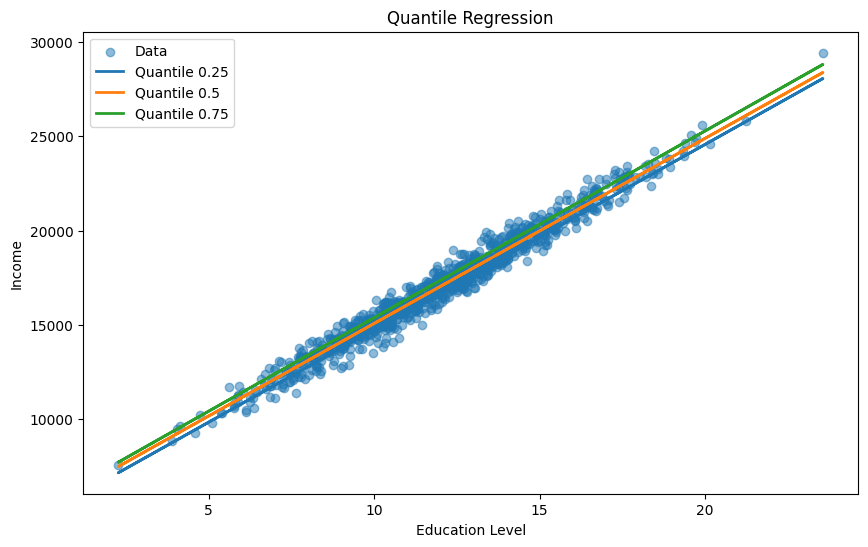

In [4]:
# Visualize regression results
plt.figure(figsize=(10, 6))

plt.scatter(data['Education'], data['Income'], alpha=0.5, label='Data')
for i, quantile in enumerate(quantiles):
    plt.plot(data['Education'], quantile_results[i].predict(sm.add_constant(data['Education'])),
             label=f'Quantile {quantile}', linewidth=2)

plt.title('Quantile Regression')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.legend()
plt.show()